<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Привет еще раз. Спасибо, что доделала работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Цель работы также хорошо бы вынести в отдельный блок вступления. Еще лучше будет, если ты сделаешь план работы с гиперссылками. Да, есть плагин ToC. Но хорошо бы уметь реализовывать интерактивный план проекта вручную. Как это реализовать - смотри по [ссылке](https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704).

</div>

# Содержание
1. [Откройте и изучите файл](#section_id_1)

2. [Разбейте данные на выборки](#section_id_2)

3. [Исследуйте модели](#section_id_3)

4. [Проверьте модель на тестовой выборке](#section_id_4)

5. [Проверьте модели на адекватность](#section_id_5)

6. [Вывод](#section_id_6)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Отлично 👍 

</div>

# Откройте и изучите файл  <a id='section_id_1'></a>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Перезапуск преокта позволяет обнаружить и исправить скрытые в коде ошибки. 

</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Предобработка данных не требуется, соглашусь. В принципе, только параметр числа звонков можно перевести в целочисленный тип. А вот знакомство с данными стоит выполнять в полном объеме. Важно вывести стат. показатели параметров, изучить корреляции в данных, построить графики зависимости целевой метки от параметров в данных. Так мы можем оценить взаимосвязи в данных и влияние параметров на целевой признак. Рекомендую посмотреть метод sns.pairplot с параметром hue, в который мы передаем целевой признак. Будет здорово, если ты сможешь это реализовать. 

</div>

In [5]:
df['calls'] = df['calls'].astype(int)

<div class="alert alert-info">
    Не уверена, что правильно тебя поняла, мы же делали этот анализ в прошлом проекте? Надо его повторить его здесь? 
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Да, ты права, с этими данными мы работали. Но все же стоит проанализировать данные  перед построением моделей. Так проект будет выглядеть полноценным. 

</div>

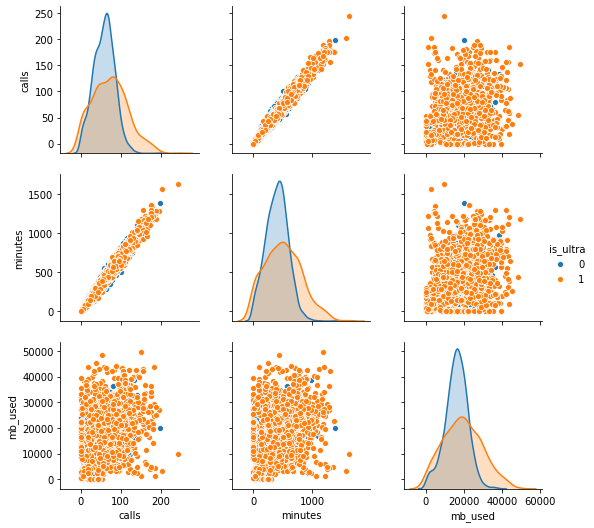

In [6]:
sns.pairplot(df, vars=['calls','minutes', 'mb_used'], hue='is_ultra')


<div class="alert alert-info">
Чтобы лучше разобраться, посмотрим на расспределение наших переменных по тарифам.
</div>

In [7]:
ultra = df[df['is_ultra'] == 1]
smart = df[df['is_ultra'] == 0]

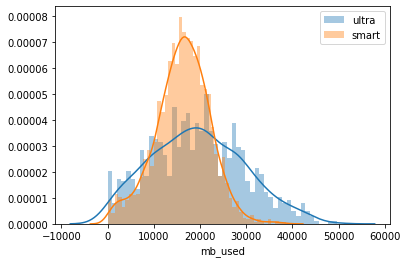

In [8]:
sns.distplot(ultra['mb_used'], kde=True, bins=50)
sns.distplot(smart['mb_used'], kde=True, bins=50)
plt.legend(['ultra', 'smart'])

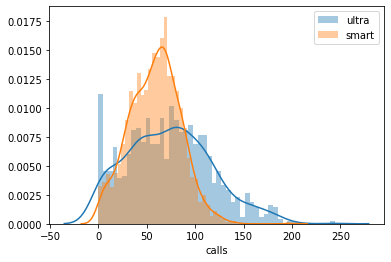

In [9]:
sns.distplot(ultra['calls'], kde=True, bins=50)
sns.distplot(smart['calls'], kde=True, bins=50)
plt.legend(['ultra', 'smart'])

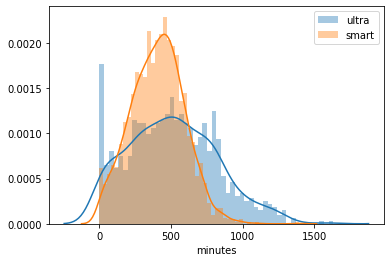

In [10]:
sns.distplot(ultra['minutes'], kde=True, bins=50)
sns.distplot(smart['minutes'], kde=True, bins=50)
plt.legend(['ultra', 'smart'])

<div class="alert alert-info">
Видно, что расспределения вомного перекрываются и лишь мала часть расспределения для тарифа ультра выходит за пределы расспределения тарифа смарт.
</div>

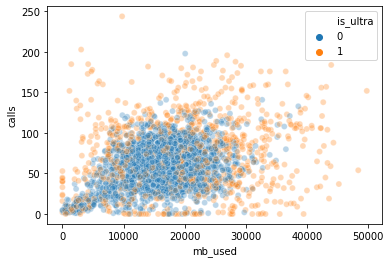

In [11]:
sns.scatterplot(data=df, x="mb_used", y="calls", hue="is_ultra", alpha=0.3)

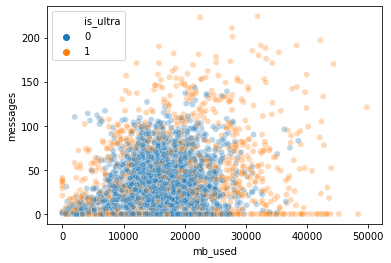

In [12]:
sns.scatterplot(data=df, x="mb_used", y="messages", hue="is_ultra", alpha=0.3)

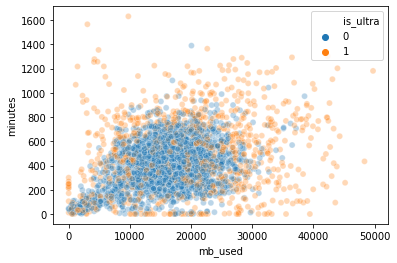

In [13]:
sns.scatterplot(data=df, x="mb_used", y="minutes", hue="is_ultra", alpha=0.3)

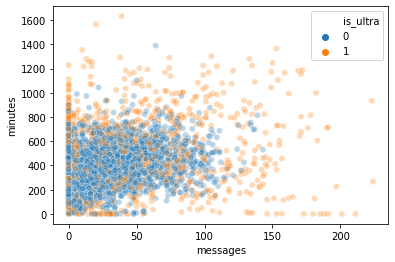

In [14]:
sns.scatterplot(data=df, x="messages", y="minutes", hue="is_ultra", alpha=0.3)

<div class="alert alert-info">
Существует слабая связь между используемыми мегабайтами и числом отправленных сообщений. Но скорее мы здесь видим просто два неравномерных кластера, тех кто отправляет мало сообщений и мало заходит в интернет и наоборот, тех кто много делает и того и того. Это любопытное наблюдение, которое можно исследовать в дальнейшем для создания новых тарифных планов.
Так же можно заметить, что стандартное отклонение для всех исследуемых переменных больше у тарифа ультра. Следовательно, поведение пользователей данного тарифа более разнообразно
</div>

<div class="alert alert-info">
Для измерения взаимосвязи между двоичной переменной и непрерывной, лучше всего использовать точечную бисериальную корреляцию. 
</div>

In [15]:
from scipy import stats 
stats.pointbiserialr(df['is_ultra'], df['mb_used'])

PointbiserialrResult(correlation=0.19856764561974266, pvalue=6.160682292124835e-30)

In [16]:
stats.pointbiserialr(df['is_ultra'], df['minutes'])

PointbiserialrResult(correlation=0.20695463812169518, pvalue=1.9859674390877193e-32)

In [17]:
stats.pointbiserialr(df['is_ultra'], df['calls'])

PointbiserialrResult(correlation=0.20712155898607568, pvalue=1.7670943506725015e-32)

<div class="alert alert-info">
На данном этапе анализа не удалось выявить сильных взаимосвязей между переменными и целевым показателем. 
</div>

Мы видим, что mean is_ultra 0.3, так как мы знаем, что пользователи тарифа ультра у нас закодированы 1-ми, мы понимаем, что у нас не равное число пользователей этих тарифов,те около 30% пользователей ultra и 70% пользователей smart. Следовательно, даже если мы просто всегда будем предсказывать, что пользователю подойдет тариф смарт, то точность у нашего предсказания будет 0.7.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Молодец, классный анализ. Надеюсь, ты увидела корреляцию параметров числа звонков и их длительности. Данная ситуация называется мультиколлинеарностью. Подробнее почитать о ней можно [тут](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#:~:text=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20(multicollinearity)%20%E2%80%94%20%D0%B2%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B5,%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8%20(%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0%D0%BC%D0%B8)%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8.). Один из параметров мы можем убрать из выборки. Данное действие не ухудшит качество наших моделей. 

</div>

# Разбейте данные на выборки <a id='section_id_2'></a>

In [18]:
from sklearn.model_selection import train_test_split

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Импорт необходимых библиотек следует производить в первой ячейке работы, как то рекомендует стандарт. 

</div>

<div class="alert alert-info">
Перенести все иморты в самую первую ячейку?
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Да,  для машинного обучения это немаловажный момент. Импортируемых библиотек очень много. 

</div>

Разделим данные в пропорции 60, 20, 20 на тренировочную, валидационную и тестувую выборку соответственно.

In [19]:
features = df.drop(['is_ultra'], axis =1)
target = df['is_ultra']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345,stratify=target)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345, stratify=target_train)



<div class="alert alert-info">
Сделала стратификацию проверила, что теперь почти одинаковое число 1 в каждой выборке.
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Здорово, что ты освоила данный параметр. Порой он увеличивает качество работы моделей. 

</div>

In [20]:
target_test.mean()

0.30637636080870917

In [21]:
target_train.mean()

0.3065352697095436

In [22]:
target_valid.mean()

0.30637636080870917

Проверим, на всякий случай, что в сумме мы получаем столько же данных сколько у нас и было.

In [23]:
len(features)

3214

In [24]:
len(features_train)+len(features_test)+len(features_valid)

3214

Все в порядке, сколько было наюлюдений, столько и осталось в трех выборках.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Отлично, теперь мы имеем все необходимые выборки для тренировки модели, подгонки гиперпараметров, а также для финального тестирования модели. С размерами выделенных групп согласен.
    
Смотри, выборки по объему 0 и 1 несколько отличаются. Сделать их доли в разных выборках одинаковыми нам поможет стратификация в методе [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

</div>

# Исследуйте модели <a id='section_id_3'></a>

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

## DecisionTree

Попробуем вначале использовать для нашей задачи дерево решений. Построим вначале дерево со случайной глубиной, например 2, и посмотрим какую точность оно выдает. 

In [26]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth = 2)
tree_model.fit(features_train, target_train)
predictions_valid_tree = tree_model.predict(features_valid)
accuracy_score(target_valid,predictions_valid_tree)

0.7838258164852255

Хорошо, точность на валидационной выборке 0.7573, это уже выше, чем если бы мы просто всегда предсказывали 0, но может существует более оптимальная глубина для нашего дерева. Проверим это перебрав разные варианты этого гиперпараметра и сравнив !!!

In [27]:
features_train

,calls,minutes,messages,mb_used
1659,27,170.58,23.0,21798.61
2176,75,489.47,7.0,20478.94
108,47,300.12,123.0,31244.61
426,36,198.96,32.0,21596.86
1892,102,740.28,19.0,17864.12
...,...,...,...,...
2298,64,475.68,20.0,8540.27
397,80,547.01,54.0,21265.57
1439,38,275.74,16.0,7122.54
3151,84,622.60,32.0,16318.74


In [28]:
frames_features = [features_train,features_valid ]
frames_target = [target_train,target_valid ]
train_val_features = pd.concat(frames_features)
train_val_target = pd.concat(frames_target)

In [29]:
model_tree = DecisionTreeClassifier(random_state=0)

In [30]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,20)}

In [31]:
from sklearn.model_selection import GridSearchCV
GridSearchCV_tree = GridSearchCV(model_tree, parametrs, cv=5)
GridSearchCV_tree.fit(train_val_features, train_val_target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20)},
             pre_dispatch='

In [32]:
GridSearchCV_tree.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [33]:
best_tree_model = GridSearchCV_tree.best_estimator_

Для интереса посмотрим сами руками как значения кросвалидации.

In [34]:
from sklearn.model_selection import cross_val_score
max_depth_values = range(1, 20)
scores_data=pd.DataFrame()
for max_depth in max_depth_values:
    model = DecisionTreeClassifier(criterion='entropy', max_depth =max_depth)
    model.fit(features_train, target_train)
    train_score = model.score(features_train,target_train)
    test_score = model.score(features_valid,target_valid)
    
    mean_cross_val_score = cross_val_score(model,features_train,target_train, cv =5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                   'train_score':[train_score],
                                   'test_score':[test_score],
                                   'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [35]:
scores_data_long = pd.melt(scores_data, id_vars= ['max_depth'],
                           value_vars = ['train_score', 'test_score', 'cross_val_score'],
                           var_name= 'set_type', value_name = 'score')

In [36]:
scores_data_long.query("set_type =='cross_val_score'").head(10)

,max_depth,set_type,score
38,1,cross_val_score,0.746871
39,2,cross_val_score,0.774875
40,3,cross_val_score,0.782126
41,4,cross_val_score,0.778515
42,5,cross_val_score,0.785770
43,6,cross_val_score,0.783166
44,7,cross_val_score,0.787327
45,8,cross_val_score,0.788890
46,9,cross_val_score,0.787855
47,10,cross_val_score,0.782138


Мы видим, что оптимальной также является глубина дерева 4 - 0.808619, но близко к ней результат для глубины 3 - 0.805519. Не стоит забывать, что кросвалидацию мы делали на тренировочной выборке. Возможно, на валидационной выборке результат будет хуже и нужно проверить не переобучиется ли наша модель на глубине 4.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Круто, что ты знаешь о поиске по сетке. Это очень важный метод по подбору гиперпараметров. Однако передавать в метод стоит все доступные для обучениея данные. Модель внутри себя выделяет валидационную выборку на каждом шаге и смотрит на результат работы по ней. Поэтому нашу валидационную выборку стоит соединить с тренировочной и передать в gridsearch именно эти данные. 

</div>

<div class="alert alert-info">
Объединила выборки, тогда следущие три ячейки не нужны
</div>

In [37]:
#best_tree_model = DecisionTreeClassifier(max_depth =9)
#best_tree_model.fit(features_train, target_train)
#predictions_valid_tree = best_tree_model.predict(features_valid)
#accuracy_score(target_valid,predictions_valid_tree)

In [38]:
#best_tree_model = DecisionTreeClassifier(max_depth =4)
#best_tree_model.fit(features_train, target_train)
#predictions_valid_tree = best_tree_model.predict(features_valid)
#accuracy_score(target_valid,predictions_valid_tree)

На валидационной выборке результат оказался лучше для глубины 3, так что оставляем такую модель как лучшею на данный момент.  

Чтобы лучше понимать на что опирается наше дерево при принятии решения, визуализируем его.

In [39]:
#plt.figure(figsize=(20,10))  
#tree.plot_tree(best_tree_model, feature_names=list(features_train), class_names=['Negative', 'Positive'],   filled=True, fontsize=10)
#plt.show()

Смотря на первый узел нашего дерева мы понимаем, что первый вопрос, который задает наш классифаер, это больше ли 262186 мегабит использует наш клиент, этот вопрос помогает ему сразу определить большую часть потенциальных клиентов тарифа ультра. Второй по важности вопрос, это больше ли 755 минут разговаривает клиент. Это согласуется с нашим анализом из прошлого модуля, который показал, что пользователи тарифа ультра правда значимо больше тратят мегабайт интернета, чем пользователи смарт.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Классная визуализация 👍  Здорово, что ты знаешь о таком способе отображения дерева решений. 

</div>

## Random forest

Попробуем теперь обучить модель Random Forest и посмотреть сможет ли она нам дать большую точность предсказания. Для этого тоже вначале найдем оптимальные гиперпараметры для нашего леса.

In [40]:
model_forest = RandomForestClassifier(random_state=0)

In [41]:
parametrs = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [1, 3, 5, 7, 9, 11], 'min_samples_leaf': [1,2,3, 5,7], 'min_samples_split': [2, 4, 6, 8]}

In [42]:
from sklearn.model_selection import GridSearchCV
GridSearchCV_rf = GridSearchCV(model_forest, parametrs, cv=3)
GridSearchCV_rf.fit(train_val_features, train_val_target)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

Просто для интереса посмотрим какие гиперпараметры оказались лучшими для нашего леса.

In [43]:
GridSearchCV_rf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

<div class="alert alert-info">
Увеличила колличество деревьев до 100
</div>

In [44]:
best_forest_model = GridSearchCV_rf.best_estimator_

In [45]:
predictions_valid_forest = best_forest_model.predict(features_valid)
accuracy_score(target_valid,predictions_valid_forest)

0.9191290824261276

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Выборку valid мы используем при обучении моделей. Поэтому результат выше не совсем честный при оценке работы модели. Он показывает нам качество работы моделей на тех данных, что она уже видела. 

</div>

Посмотрим какие параметры важны для нашего леса.

In [46]:
features_importance = best_forest_model.feature_importances_

In [47]:
features_importance_df = pd.DataFrame({'features': list(features_test),
                                       'features_importance': features_importance})

In [48]:
features_importance_df.sort_values('features_importance', ascending=False)

,features,features_importance
3,mb_used,0.371411
1,minutes,0.226116
0,calls,0.208958
2,messages,0.193515


Параметр колличества использованных мегабайт, так же как и для дерева решений является самым важным. Если бы нам по каким-то причинам пришлось бы сокращать число призников в используемых моделях, мы знаем, что это скорее было бы число звонков.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

С лесом ты разобралась. Обычно рассматривают до 100-150 деревьев. Заметь, что с увеличением числа деревьев качество модели растет. Попробуй рассмотреть большее число деревьев. 
    
Также полезно оценить качество модели и на тренировочной выборке для того, чтобы понять, насколько переобучается модель. 

</div>

## Логистическая регрессия

Попробуем так же применить к нашим данным модель логистической регрессии, так как она несклонна к переобучению и может показать себя эффективнее, чем дерево решений.

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
model_reg = LogisticRegression(random_state=12345) 
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
GridSearchCV_reg = GridSearchCV(model_reg, param_grid=grid_values)
GridSearchCV_reg.fit(train_val_features, train_val_target)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=12345, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
GridSearchCV_reg.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=12345, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
GridSearchCV_reg.score(features_valid, target_valid)

0.7542768273716952

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

С предупреждениями также стоит разобраться. Иногда их бывает слишком много, поэтому важно уметь их скрывать. В этом тебе поможет библиотека warnings. Попробуй найти подходящий метод и убрать предупреждения.  

</div>

Точность оказалась равна 0.75 те варианта.

Вывод: Точность на валидационной выборке оказалась лучше всего у случайного леса 0.7869.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
   
В логистической регрессии также стоит подбирать гиперпараметры. Не совсем честно на одних моделях их подбирать, а другие использовать по умолчанию. Обрати внимание на имеющиеся у [данной модели](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) параметры.

</div>

<div class="alert alert-info">
Сделала
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Качество работы несколько выросло, но все равно недотягивает до других моделей. 

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Все получаемые метрики моделей советую собирать в единую табличку. Она нам сильно пригодится при выборе наилучшей модели. 

</div>

# Проверьте модель на тестовой выборке 

Проверим наши модели на тестовых данных.

- Результаты для лучшей модели дерева решений на тестовой выборке.

In [53]:
predictions_test_tree = best_tree_model.predict(features_test)
accuracy_score(target_test,predictions_test_tree)

0.7900466562986003

- Результаты для лучшей модели случайного леса на тестовой выборке.

In [54]:
predictions_test_forest = best_forest_model.predict(features_test)
accuracy_score(target_test,predictions_test_forest)

0.8087091757387247

- Результаты для лучшей модели случайного леса на тестовой выборке.

In [55]:
GridSearchCV_reg.score(features_test, target_test) 

0.7433903576982893

Вывод: результаты на тестовой выборке так же лучше для модели случайного леса - 0.80.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Модель перед финальным тестированием стоит обучить на полных данных, т.е. на совместной тренировочной и валидационной выборках. Соедини их, затем обучи модель на этих данных и проверь качество модели на тестовой выборке. 

</div>

<div class="alert alert-info">
Выше обучала уже на склееных выборках
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Да, теперь все верно, в обучении используются все доступные для этого данные.  

</div>

## (бонус) Проверьте модели на адекватность <a id='section_id_5'></a>

In [56]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Мы помним, что наша выборка не сбалансирована по числу пользователей тарифа ультра и смарт. Предположим, такую логику. Клиенты тарифа ультра (те 1) приносят нам, как компании больше денег, поэтому нам важно всегда их верно определять, нам не так страшно предложить этот тариф клиенту, который скорее относится к классу тарифа смарт(те совершить false positive ошибку), как страшно не предложить тариф ультра, пользователю который относится к классу пользователей тарифа ультра (те совершить false negative ошибку). Чтобы проверить как наши модели справляются с этими задачами посмотрим на метрики precision(точность) и recall(полнота). 

In [57]:
precision_score(target_test, predictions_test_forest, average='micro')

0.8087091757387247

In [58]:
recall_score(target_test, predictions_test_forest)

0.5126903553299492

In [59]:
precision_score(target_test, predictions_test_tree, average='micro')

0.7900466562986003

In [60]:
recall_score(target_test, predictions_test_tree)

0.4720812182741117

Случайный лес снова показал себя как лучшая модель, но мы можем видеть, что показатель полноты модели даже для него достаточно низкий - 0.5, другими словами на каждого правильно предсказанного пользователя тарифа ультра у нас есть один пропущенный. 

Если исходить из предположения, что я очень боюсь упустить потенциальных клиентов тарифа ультра такая полнота модели меня не устроит. Посмотрим как расспределены вероятности внутри нашей модели.

In [61]:
target_predicted_probability = best_forest_model.predict_proba(features_test)

Text(0, 0.5, 'Number of observations')

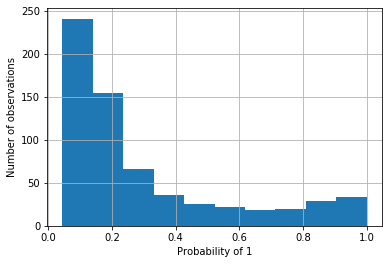

In [62]:
ax = pd.Series(target_predicted_probability[ :, 1]).hist()
ax.set_xlabel('Probability of 1')
ax.set_ylabel('Number of observations')

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Не забывай делать подписи осей и названия рисункам. Без этого порой сложно понять, что именно мы анализируем. 

</div>

<div class="alert alert-info">
Подписала
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Не забывай про данные важные элементы любого графика. 

</div>

Мы видим, что у нас много маленьких вероятностей этого события. Можно изменить строгость критерия принятия решения о предсказании тарифа ультра, даже если есть маленькая вероятность, что пользователь может быть потенциальным клиентом тарифа ультра, то стоит ему его предложить. Понизим порог принятия в класс 1 до 0,3  те до 30% вероятности.

In [63]:
predictions_new =np.where(target_predicted_probability[ :, 1] > 0.3, 1, 0) #если вероятность больше 0,3 - 1, иначе 0 

In [64]:
precision_score(target_test, predictions_new)

0.6313131313131313

In [65]:
recall_score(target_test, predictions_new)

0.6345177664974619

In [66]:
accuracy_score(target_test,predictions_new)

0.7744945567651633

Точность нашей модели осталась в пределах заданного изначально accuracy большем 0.75, но зато recall стал выше. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Проверить качество константной модели нам поможет [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Будет здорово, если ты изучишь данную модель. 

</div>

In [68]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_val_features, train_val_target)
predictions_dammy = dummy_clf.predict(features_test)
accuracy_score(target_test,predictions_dammy)

0.6936236391912908

Значения для дамми класифаера похожи на вариант, когда мы для всех клиентов передсказываем 0.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Да, он так и работает при выбранной тобой стратегии. 

</div>

# Вывод 

Мы построили модель случайного леса, определили для него оптимальные гиперпараметры. Мы смогли достич точности оценки 0.8 на тестовой выборке, самым главным параметром для нашей модели стало колличество мегабайт. Когда мы потробнее изучили значения precision и recall, то мы поняли, что возможно стоит снизить строгость критерия, чтобы уменьшить вероятность пропусков потенциальных клиентов тарифа ультра ( false negative), тогда точность упадет до 0.77. 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Выводы описаны грамотно. Необходимое качество достигнуто. В выводах можно приводить полученные ранее значения, верно. Здорово, что расписано то, что было сделано в ходе проведения работы. 

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики. Советую обратить внимание на метод pairplot. 

Ты проделала большую работу, молодец! Ты овладела важными на данном этапе обучения инструментами, а также довольно качественно их используешь. Критических замечаний немного. Однако их важно исправить. Также есть достаточное число желтых комментариев. Думаю, исправить и их тебе не составит труда. Жду твою работу :)

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Помарки исправлены, и теперь работа выполнена хорошо. У тебя получился классный проект, молодец. Шаг в машинное обучение сделан! Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Спасибо за оставленные комментари по исправлениям. Успехов в дальнейшем пути :)

</div>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
